<a href="https://colab.research.google.com/github/Basel-byte/Speech-Emotion-Recognition/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import wavfile
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = "/content/drive/MyDrive/Crema"
if not os.path.exists(dir_path):
  !unzip /content/drive/MyDrive/Crema.zip -d /content/drive/MyDrive/Crema

In [ ]:
labels = []
audio_waves = []
for file_name in os.listdir(dir_path):
  labels.append(file_name[9:12])
  audio_waves.append(librosa.load(os.path.join(dir_path, file_name)))
print(labels)
lb = LabelBinarizer()
encoded_labels = lb.fit_transform(labels)
print(encoded_labels.shape)
lb.classes_

['SAD', 'DIS', 'NEU', 'DIS', 'NEU', 'DIS', 'FEA', 'ANG', 'SAD', 'HAP', 'NEU', 'FEA', 'NEU', 'FEA', 'HAP', 'FEA', 'HAP', 'HAP', 'SAD', 'DIS', 'ANG', 'FEA', 'FEA', 'SAD', 'SAD', 'FEA', 'DIS', 'FEA', 'SAD', 'ANG', 'HAP', 'FEA', 'NEU', 'FEA', 'NEU', 'HAP', 'ANG', 'ANG', 'SAD', 'HAP', 'DIS', 'FEA', 'FEA', 'DIS', 'DIS', 'DIS', 'NEU', 'DIS', 'ANG', 'SAD', 'DIS', 'ANG', 'HAP', 'NEU', 'HAP', 'DIS', 'SAD', 'NEU', 'DIS', 'FEA', 'SAD', 'DIS', 'FEA', 'HAP', 'NEU', 'HAP', 'ANG', 'DIS', 'HAP', 'DIS', 'SAD', 'FEA', 'NEU', 'HAP', 'DIS', 'ANG', 'ANG', 'DIS', 'SAD', 'DIS', 'NEU', 'SAD', 'FEA', 'NEU', 'DIS', 'FEA', 'SAD', 'ANG', 'NEU', 'NEU', 'DIS', 'DIS', 'FEA', 'HAP', 'SAD', 'FEA', 'DIS', 'HAP', 'SAD', 'DIS', 'NEU', 'DIS', 'FEA', 'ANG', 'ANG', 'ANG', 'ANG', 'HAP', 'HAP', 'FEA', 'FEA', 'FEA', 'ANG', 'HAP', 'HAP', 'ANG', 'NEU', 'SAD', 'ANG', 'ANG', 'FEA', 'DIS', 'ANG', 'DIS', 'FEA', 'SAD', 'DIS', 'FEA', 'FEA', 'FEA', 'NEU', 'HAP', 'NEU', 'SAD', 'SAD', 'FEA', 'DIS', 'HAP', 'ANG', 'DIS', 'ANG', 'NEU', 'ANG'

array(['ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'], dtype='<U3')

In [ ]:
max_frames = 200
n_mfcc = 40
features = n_mfcc + 2
data = np.empty((len(labels), features * max_frames, 1))
for i, audio in enumerate(audio_waves):
  signal, sr = audio
  mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
  sample = np.vstack((mfccs, librosa.feature.zero_crossing_rate(y=signal)))
  sample = np.vstack((sample, librosa.feature.rms(y=signal)))
  if mfccs.shape[1] < max_frames:
    sample = np.pad(sample, ((0, 0), (0, max_frames - mfccs.shape[1])), mode='constant')
  else:
    sample = sample[:, :max_frames]
  data[i] = sample.reshape((features * max_frames, 1))

In [ ]:
print(data.shape)

(7442, 8400, 1)


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, encoded_labels, test_size=0.3, stratify=encoded_labels, random_state=42)
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data, train_labels, test_size=0.05, stratify=train_labels, random_state=42)

In [ ]:
data = np.empty((len(labels), features * max_frames, 1))
for i, audio in enumerate(audio_waves):
  signal, sr = audio
  mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
  sample = np.vstack((mfccs, librosa.feature.zero_crossing_rate(y=signal)))
  sample = np.vstack((sample, librosa.feature.rms(y=signal)))
  if mfccs.shape[1] < max_frames:
    sample = np.pad(sample, ((0, 0), (0, max_frames - mfccs.shape[1])), mode='constant')
  else:
    sample = sample[:, :max_frames]
  data[i] = sample.reshape((features * max_frames, 1))

22050
(40, 143)


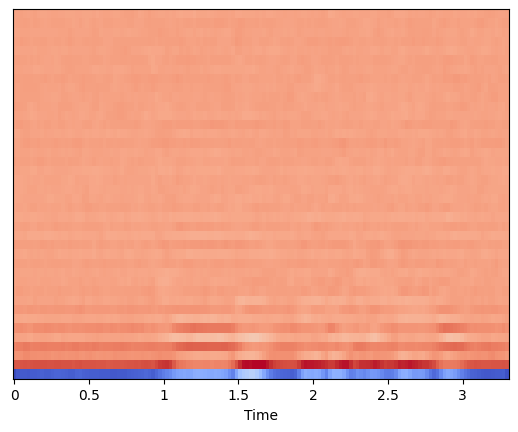

------ (128, 143)
------ (128, 143)


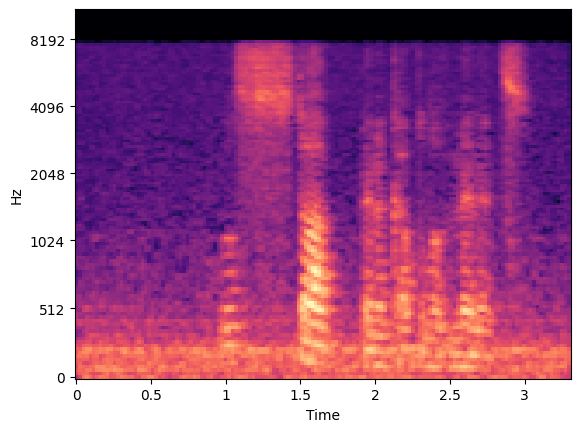

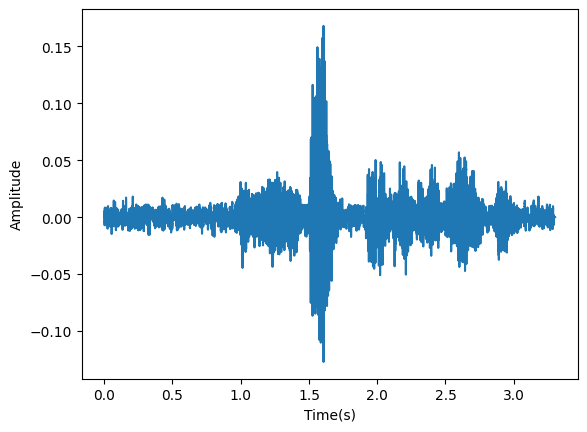

In [12]:
def visualize_audio_signal(audio_wave):
  signal, sr = audio_wave
  print(sr)
  mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
  print(mfccs.shape)
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')
  plt.show()
  mel_spec = librosa.feature.melspectrogram(y=signal)
  print("------", mel_spec.shape)
  mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
  print("------", mel_spec_db.shape)
  librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
  time = np.arange(0,len(signal)) / sr
  fig, ax = plt.subplots()
  ax.plot(time, signal)
  ax.set(xlabel='Time(s)',ylabel='Amplitude')
  plt.show()
  df = pd.DataFrame(mfccs)
  df

visualize_audio_signal(audio_waves[0])

In [ ]:
# ibrosa.feature.melspectrogram(audio,
#                                     sr=sampling_rate,
#                                     n_mels=n_mels,
#                                     hop_length=hop_length,
#                                     n_fft=n_fft,
#                                     fmin=fmin,
#                                     fmax=fmax)
mel_spec = librosa.feature.melspectrogram(y=audio_waves[0][0])
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
audio = audio_waves[0]
print(audio[0].shape)
print(audio[1])
zero_cross = librosa.feature.zero_crossing_rate(y=signal)
zero_cross.shape

In [61]:
# def get_spectogram_circular_padded(mel_spec, max_frames):
#   n_frames = mel_spec[1]
#   n_pad_left = (max_frames - n_frames) // 2
#   n_pad_right = max_frames - n_frames - n_pad_left
#   left_pad = mel_spec[:, -n_pad_left:]
#   right_pad = mel_spec[:, :n_pad_right]
#   return np.hstack((left_pad, mel_spec, right_pad))

def get_spectogram_circulary_padded(mel_spec, max_frames):
  n_frames = mel_spec.shape[1]
  if n_frames < max_frames:
    n_pad = max_frames - n_frames
    n = n_pad // n_frames
    mod = n_pad % n_frames
    pad = mel_spec[:, :mod]
    result = np.hstack((mel_spec, pad))
    for i in range(n):
      result = np.hstack((result, mel_spec))
    return result
  else:
    return mel_spec[:, :max_frames]

# get_spectogram_circulary_padded(librosa.feature.melspectrogram(y=audio_waves[20][0]), max_frames)

In [63]:
data2 = np.empty((len(labels), 128, max_frames, 3))
for i, audio in enumerate(audio_waves):
  signal, sr = audio
  mel_spec = librosa.feature.melspectrogram(y=signal)
  mel_spec = get_spectogram_circulary_padded(mel_spec, max_frames)
  delta1 = librosa.feature.delta(mel_spec, delta=1)
  delta2 = librosa.feature.delta(mel_spec, delta=2)
  data2[i] = np.dstack((mel_spec, delta1, delta2)) 

In [65]:
train_data2, test_data2, train_labels2, test_labels2 = train_test_split(data, encoded_labels, test_size=0.3, stratify=encoded_labels, random_state=42)
train_data2, valid_data2, train_labels2, valid_labels2 = train_test_split(train_data2, train_labels2, test_size=0.05, stratify=train_labels2, random_state=42)